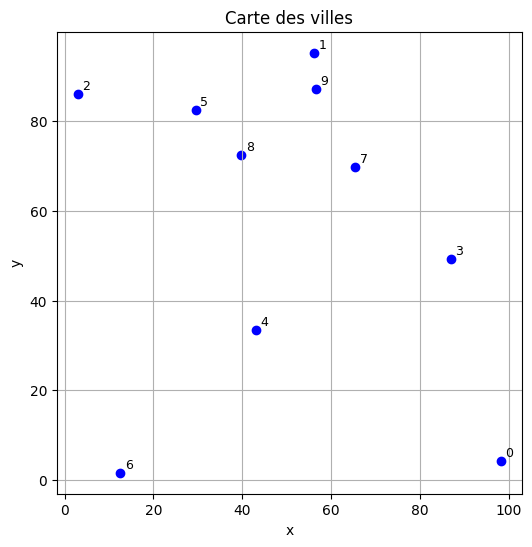

[0.0, 100.05715426619945, 125.30538431170582, 46.363734788622445, 62.26585784407103, 103.91930034837262, 85.60201366413744, 73.16527832799683, 89.618134941423, 92.69303990716661]
[100.05715426619945, 0.0, 53.939031047035506, 55.1945743233832, 63.116842199950476, 29.56834887817784, 103.1795974328529, 27.01881714658279, 28.13069480214981, 8.027407086416813]
[125.30538431170582, 53.939031047035506, 0.0, 91.50884184113285, 66.03257444997763, 26.719397642313847, 84.81115309293996, 64.45586502628558, 39.15744401742448, 53.47339646070927]
[46.363734788622445, 55.1945743233832, 91.50884184113285, 0.0, 46.610980323960376, 66.22644826315174, 88.29512011354805, 29.6601546999535, 52.46216555623007, 48.53622111619099]
[62.26585784407103, 63.116842199950476, 66.03257444997763, 46.610980323960376, 0.0, 50.797958203837226, 44.04649550671421, 42.68359329875801, 39.04544785406577, 55.37144714726315]
[103.91930034837262, 29.56834887817784, 26.719397642313847, 66.22644826315174, 50.797958203837226, 0.0, 8

In [ ]:
# Import des fonctions utiles
from tsp_utils import generer_villes, afficher_villes, calculer_matrice_distances

# Génération de 10 villes aléatoires
villes = generer_villes(10)

# Affichage des villes sur un plan
afficher_villes(villes)

# Calcul de la matrice des distances euclidiennes
distances = calculer_matrice_distances(villes)

# Affichage de la matrice des distances
for row in distances:
    print(row)


In [ ]:
from tsp_utils import generer_villes, calculer_matrice_distances, nearest_neighbor

for n in [10, 20, 50, 100]:
    print(f"\n--- Test avec {n} villes ---")
    villes = generer_villes(n)
    distances = calculer_matrice_distances(villes)
    chemin, total, temps = nearest_neighbor(villes, distances)

    print("Chemin trouvé :", chemin)
    print("Distance totale :", round(total, 2))
    print("Temps d'exécution :", round(temps, 4), "secondes")



--- Test avec 10 villes ---
Chemin trouvé : [0, 5, 8, 3, 6, 4, 7, 2, 9, 1, 0]
Distance totale : 223.95
Temps d'exécution : 0.0 secondes

--- Test avec 20 villes ---
Chemin trouvé : [0, 4, 12, 11, 5, 6, 15, 10, 16, 19, 9, 2, 13, 1, 17, 18, 7, 14, 8, 3, 0]
Distance totale : 503.65
Temps d'exécution : 0.0 secondes

--- Test avec 50 villes ---
Chemin trouvé : [0, 6, 14, 3, 15, 45, 10, 32, 19, 23, 8, 9, 39, 28, 26, 1, 38, 41, 29, 20, 24, 36, 12, 31, 47, 16, 7, 5, 40, 11, 48, 13, 27, 42, 33, 17, 43, 18, 35, 30, 46, 25, 22, 21, 44, 37, 34, 49, 4, 2, 0]
Distance totale : 842.42
Temps d'exécution : 0.0 secondes

--- Test avec 100 villes ---
Chemin trouvé : [0, 45, 76, 93, 70, 17, 61, 10, 97, 23, 68, 57, 3, 62, 13, 43, 29, 27, 58, 54, 64, 26, 16, 71, 96, 18, 63, 40, 50, 2, 83, 92, 74, 56, 9, 19, 38, 46, 90, 72, 15, 42, 33, 87, 35, 89, 80, 48, 91, 30, 41, 32, 86, 11, 37, 24, 85, 94, 78, 22, 95, 21, 8, 36, 67, 1, 12, 44, 79, 73, 20, 25, 34, 60, 49, 5, 51, 53, 28, 59, 39, 88, 98, 82, 31, 55, 4, 6,


--- Test avec 10 villes ---
🔹 Nearest Neighbor
  Distance totale : 319.47
  Temps d'exécution : 0.0000 s
🔹 Insertion Heuristique
  Distance totale : 309.29
  Temps d'exécution : 0.0000 s


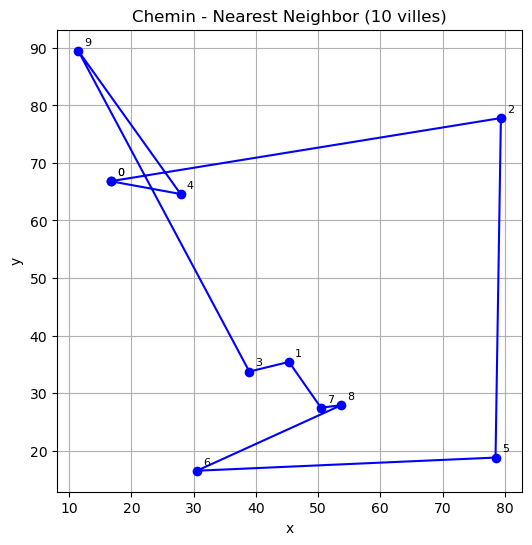

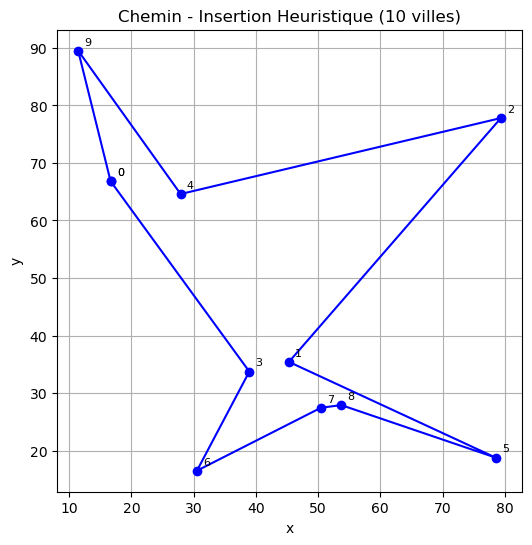


--- Test avec 20 villes ---
🔹 Nearest Neighbor
  Distance totale : 385.14
  Temps d'exécution : 0.0000 s
🔹 Insertion Heuristique
  Distance totale : 355.80
  Temps d'exécution : 0.0010 s

--- Test avec 50 villes ---
🔹 Nearest Neighbor
  Distance totale : 688.26
  Temps d'exécution : 0.0010 s
🔹 Insertion Heuristique
  Distance totale : 684.18
  Temps d'exécution : 0.0269 s

--- Test avec 100 villes ---
🔹 Nearest Neighbor
  Distance totale : 1025.45
  Temps d'exécution : 0.0030 s
🔹 Insertion Heuristique
  Distance totale : 1005.98
  Temps d'exécution : 0.5366 s


In [5]:
import matplotlib.pyplot as plt
from tsp_utils import generer_villes, calculer_matrice_distances, nearest_neighbor

# Heuristique d'Insertion
def insertion_heuristique(villes, distances):
    import time
    start_time = time.time()
    n = len(villes)

    non_visitees = list(range(n))
    tour = [0, 1, 0]  # On commence avec les villes 0 → 1 → 0
    non_visitees.remove(0)
    non_visitees.remove(1)

    while non_visitees:
        meilleur_cout = float('inf')
        meilleure_ville = None
        meilleure_position = None

        for ville in non_visitees:
            for i in range(1, len(tour)):
                a = tour[i - 1]
                b = tour[i]
                cout = distances[a][ville] + distances[ville][b] - distances[a][b]
                if cout < meilleur_cout:
                    meilleur_cout = cout
                    meilleure_ville = ville
                    meilleure_position = i

        tour.insert(meilleure_position, meilleure_ville)
        non_visitees.remove(meilleure_ville)

    # Calcul de la distance totale
    total_distance = 0
    for i in range(len(tour) - 1):
        total_distance += distances[tour[i]][tour[i + 1]]

    execution_time = time.time() - start_time
    return tour, total_distance, execution_time

# Visualisation du chemin
def tracer_chemin(villes, chemin, titre):
    x = [villes[i][0] for i in chemin]
    y = [villes[i][1] for i in chemin]
    plt.figure(figsize=(6, 6))
    plt.plot(x, y, 'o-', color='blue')
    for i, (xi, yi) in enumerate(zip(x, y)):
        plt.text(xi + 1, yi + 1, str(chemin[i]), fontsize=8)
    plt.title(titre)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.show()

# Tests sur plusieurs tailles de problème
for n in [10, 20, 50, 100]:
    print(f"\n--- Test avec {n} villes ---")
    villes = generer_villes(n)
    distances = calculer_matrice_distances(villes)

    chemin_nn, dist_nn, t_nn = nearest_neighbor(villes, distances)
    chemin_ins, dist_ins, t_ins = insertion_heuristique(villes, distances)

    print("🔹 Nearest Neighbor")
    print(f"  Distance totale : {dist_nn:.2f}")
    print(f"  Temps d'exécution : {t_nn:.4f} s")

    print("🔹 Insertion Heuristique")
    print(f"  Distance totale : {dist_ins:.2f}")
    print(f"  Temps d'exécution : {t_ins:.4f} s")

    # Visualisation pour n = 10 seulement (évite surcharge graphique)
    if n == 10:
        tracer_chemin(villes, chemin_nn, "Chemin - Nearest Neighbor (10 villes)")
        tracer_chemin(villes, chemin_ins, "Chemin - Insertion Heuristique (10 villes)")